# 🚀 LIVE CODING : Les Fondamentaux du Machine Learning
---
**Formateur :** NFALY SYLLA  
**Événement :** CODE "MATRIX" - Session Spéciale Débutant  
**Date :** Samedi 28 Juin 2025

### Objectif de ce Notebook
Ce notebook est le compagnon de notre masterclass de 2 heures. Il vous guidera à travers :
1.  **Application 1 - Découverte :** Comprendre les bases de la régression linéaire avec un dataset ultra-simple de 5 maisons.
2.  **Application 2 - Plongée :** Appliquer un workflow de Data Science complet sur un dataset immobilier réel pour prédire le prix de vente de maisons.

> **Toutes les ressources (slides, ce notebook) sont disponibles sur notre repo GitHub :**  
> [https://github.com/rmss00-2synf/aids-repo](https://github.com/rmss00-2synf/aids-repo)

In [ ]:
# ===============================================
#  ÉTAPE 0 : IMPORTATION DES BIBLIOTHÈQUES
# ===============================================
# C'est la première chose à faire dans tout projet de Data Science.
# On importe les outils dont on aura besoin.

# Pour la manipulation de données
import pandas as pd
import numpy as np

# Pour la visualisation de données
import matplotlib.pyplot as plt
import seaborn as sns

# Pour le Machine Learning avec Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler # Pour mettre les données à l'échelle
from sklearn import metrics # Pour évaluer nos modèles

# Paramètres pour des graphiques plus jolis
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=12)

print("✅ Bibliothèques importées avec succès !")

✅ Bibliothèques importées avec succès !


# 🎯 Application 1 : Découverte - Notre Premier Modèle (25 min)
---
L'objectif ici est de comprendre l'intuition fondamentale de la régression linéaire avec un exemple que l'on peut visualiser et comprendre en un coup d'œil.

**Le défi :** On a les données de 5 maisons. On veut prédire le prix d'une nouvelle maison en se basant uniquement sur sa surface.

In [ ]:
# ==========================================================
#  1.1 - CRÉATION DE NOTRE MINI-DATASET
# ==========================================================
# Pour cet exemple, nos données sont basées sur le nouveau dataset 'Housing'.
# On prend 5 exemples simples qui ressemblent aux vraies données.
df_simple = pd.read_csv('Housing_Simple.csv')

print("Notre premier dataset simple :")
df_simple

Notre premier dataset simple :


,area,price
0,100,1218000
1,120,1440000
2,150,1800000
3,260,2860000
4,320,2880000


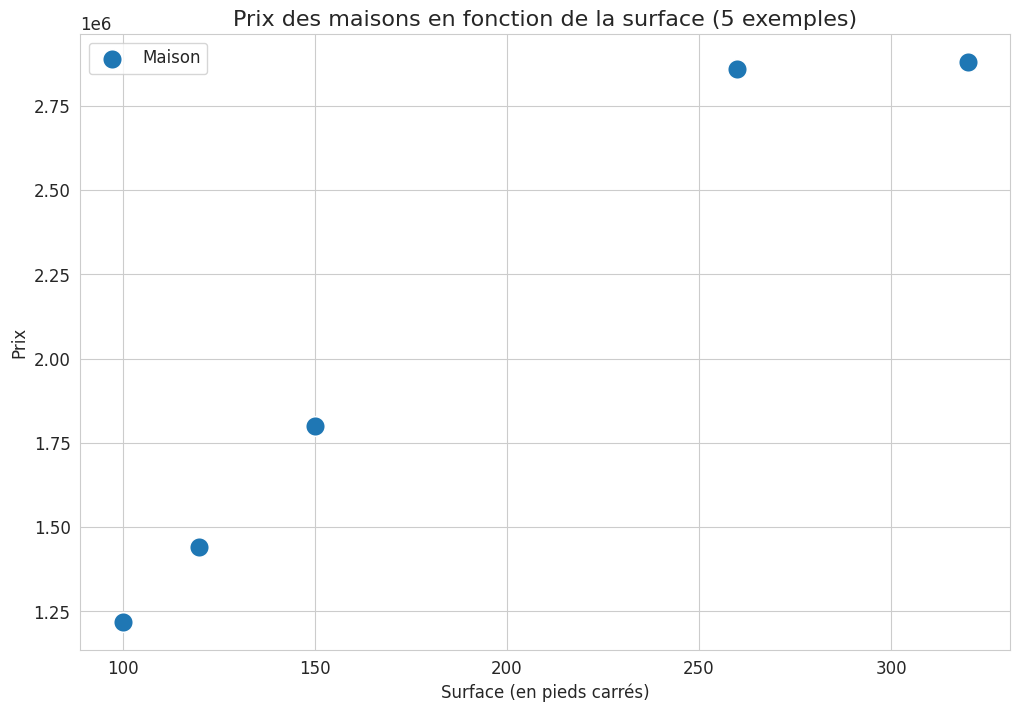

In [ ]:
# ==========================================================
#  1.2 - VISUALISATION : L'ÉTAPE LA PLUS IMPORTANTE !
# ==========================================================
# Un bon Data Scientist regarde toujours ses données avant tout.
# On va créer un nuage de points (scatter plot).

sns.scatterplot(x='area', y='price', data=df_simple, s=200, label='Maison')
plt.title('Prix des maisons en fonction de la surface (5 exemples)', fontsize=16)
plt.xlabel('Surface (en pieds carrés)', fontsize=12)
plt.ylabel('Prix', fontsize=12)
plt.grid(True)
plt.show()

# À ce stade, on demande à l'audience : "Quelle forme simple pourrait représenter cette tendance ?"
# La réponse attendue est "une ligne droite".

In [ ]:
# ==========================================================
#  1.3 - ENTRAÎNEMENT DU MODÈLE DE RÉGRESSION LINÉAIRE
# ==========================================================
# On va maintenant demander à la machine de trouver la "meilleure ligne"
# qui passe à travers ces points.

# 1. Définir les "features" (X) et la "target" (y)
X_simple = df_simple[['area']]  # Double crochets pour garder le format DataFrame
y_simple = df_simple['price']

# 2. Créer et entraîner le modèle
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

print("✅ Modèle entraîné !")
print(f"Le modèle a trouvé l'équation : Prix = {model_simple.coef_[0]:.2f} * Surface + {model_simple.intercept_:.2f}")

✅ Modèle entraîné !
Le modèle a trouvé l'équation : Prix = 8026.92 * Surface + 514484.62


   area    price
0   100  1218000
1   120  1440000
2   150  1800000
3   260  2860000
4   320  2880000
➡️ Prix prédit pour une maison de 200 pieds carrés : 2119869 €


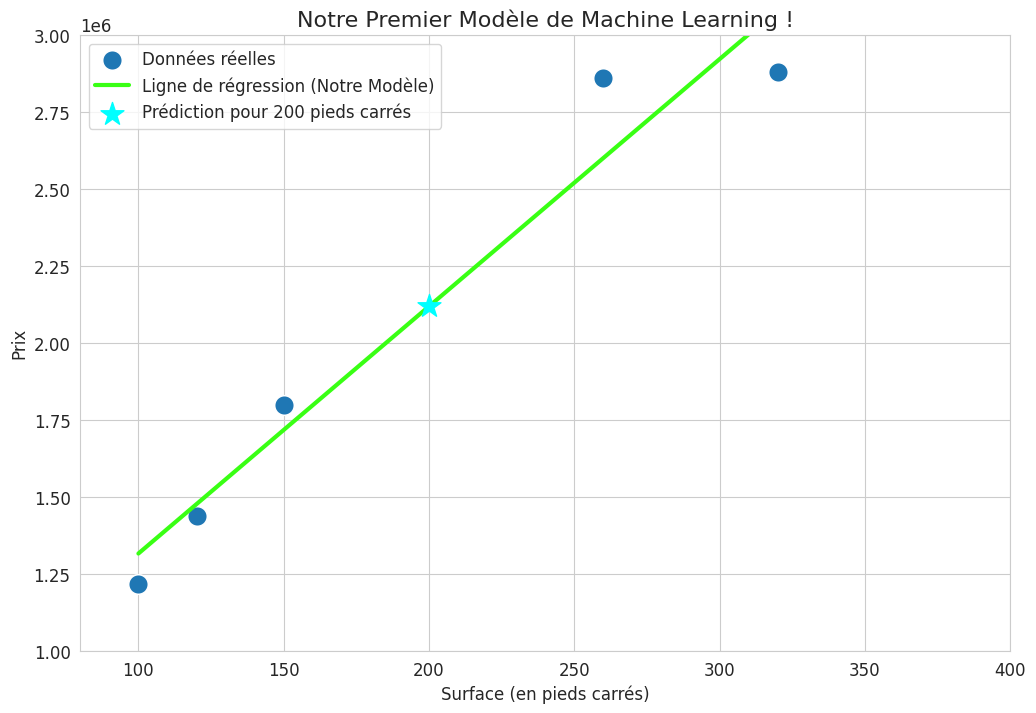

In [ ]:
# ==========================================================
#  1.4 - PRÉDICTION & VISUALISATION DU RÉSULTAT
# ==========================================================
# Maintenant que le modèle est entraîné, on peut l'utiliser !

# Prédisons le prix pour une maison de 5500 pieds carrés
surface_a_predire = [[200]]
prix_predit = model_simple.predict(surface_a_predire)
print(df_simple)
print(f"➡️ Prix prédit pour une maison de {surface_a_predire[0][0]} pieds carrés : {int(prix_predit[0])} €")

# Visualisons la ligne que le modèle a apprise
sns.scatterplot(x='area', y='price', data=df_simple, s=200, label='Données réelles')
plt.plot(df_simple['area'], model_simple.predict(X_simple), color='#39FF14', linewidth=3, label='Ligne de régression (Notre Modèle)') # Ligne vert "Matrix"
plt.scatter(surface_a_predire, prix_predit, color='cyan', s=300, marker='*', zorder=5, label=f'Prédiction pour {surface_a_predire[0][0]} pieds carrés')
plt.title('Notre Premier Modèle de Machine Learning !', fontsize=16)
plt.xlabel('Surface (en pieds carrés)', fontsize=12)
plt.ylabel('Prix', fontsize=12)
plt.legend()
plt.grid(True)
plt.xlim(80, 400)   # Limite de l’axe des abscisses : de 0 à 6000 pieds carrés
plt.ylim(1000000, 3000000)  # Limite de l’axe des ordonnées : de 0 à 1 200 000 €
plt.show()

# 🌊 Application 2 : Plongée - Le Défi "Housing" avec la Régression Linéaire (50 min)
---
Maintenant que nous avons compris l'intuition avec un cas simple, nous allons appliquer un workflow complet et rigoureux sur notre dataset "Housing" (545 maisons, 13 caractéristiques).

**Notre mission :** Prédire le prix d'une maison en utilisant **uniquement la Régression Linéaire**, mais en préparant nos données comme des professionnels pour en tirer le meilleur !

**Notre Workflow Stratégique :**
1.  **Exploration & Visualisation (EDA) :** Trouver les secrets cachés dans les données.
2.  **Prétraitement & Feature Engineering :** Transformer nos données brutes en or pour notre modèle.
3.  **Modélisation :** Entraîner notre modèle de Régression Linéaire.
4.  **Évaluation Rigoureuse :** Comprendre si notre modèle est bon et pourquoi.
5.  **Interprétation & Déploiement (Conceptuel) :** Donner un sens aux résultats et imaginer la suite.

In [ ]:
# ==========================================================
#  2.1 - CHARGEMENT & PREMIÈRE EXPLORATION
# ==========================================================
# Assurez-vous d'avoir uploadé le fichier 'Housing.csv' dans Colab
try:
    df = pd.read_csv('Housing.csv')
    print("✅ Dataset 'Housing' chargé avec succès !")
    print(f"Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
except FileNotFoundError:
    print("❌ ERREUR : Le fichier 'Housing.csv' n'a pas été trouvé. Veuillez l'uploader.")

# Créons une copie pour ne pas modifier l'original
df_processed = df.copy()

# Afficher un aperçu et les informations
print("\nAperçu des données brutes :")
display(df_processed.head())

print("\nInformations sur les colonnes :")
df_processed.info()

✅ Dataset 'Housing' chargé avec succès !
Le dataset contient 545 lignes et 13 colonnes.

Aperçu des données brutes :


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              535 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


### Étape 2.2 : Analyse Exploratoire de Données (EDA) - L'Art de l'Investigation

Avant de toucher aux données, on doit les comprendre. C'est l'étape la plus créative ! On va essayer de répondre à quelques questions business.

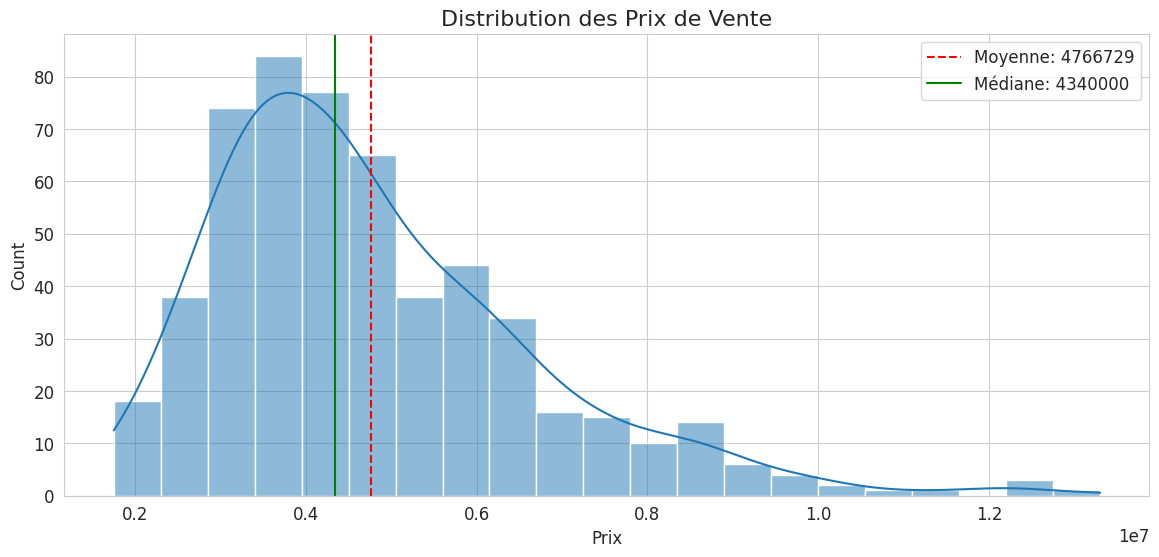

In [ ]:
# --- 1. Comment se distribue notre variable cible, le prix ? ---
plt.figure(figsize=(14, 6))
sns.histplot(df_processed['price'], kde=True)
plt.title('Distribution des Prix de Vente', fontsize=16)
plt.xlabel('Prix')
plt.axvline(df_processed['price'].mean(), color='red', linestyle='--', label=f"Moyenne: {df_processed['price'].mean():.0f}")
plt.axvline(df_processed['price'].median(), color='green', linestyle='-', label=f"Médiane: {df_processed['price'].median():.0f}")
plt.legend()
plt.show()
# On voit que la distribution est un peu étalée vers la droite (quelques maisons très chères).
# La moyenne est tirée vers le haut par rapport à la médiane.

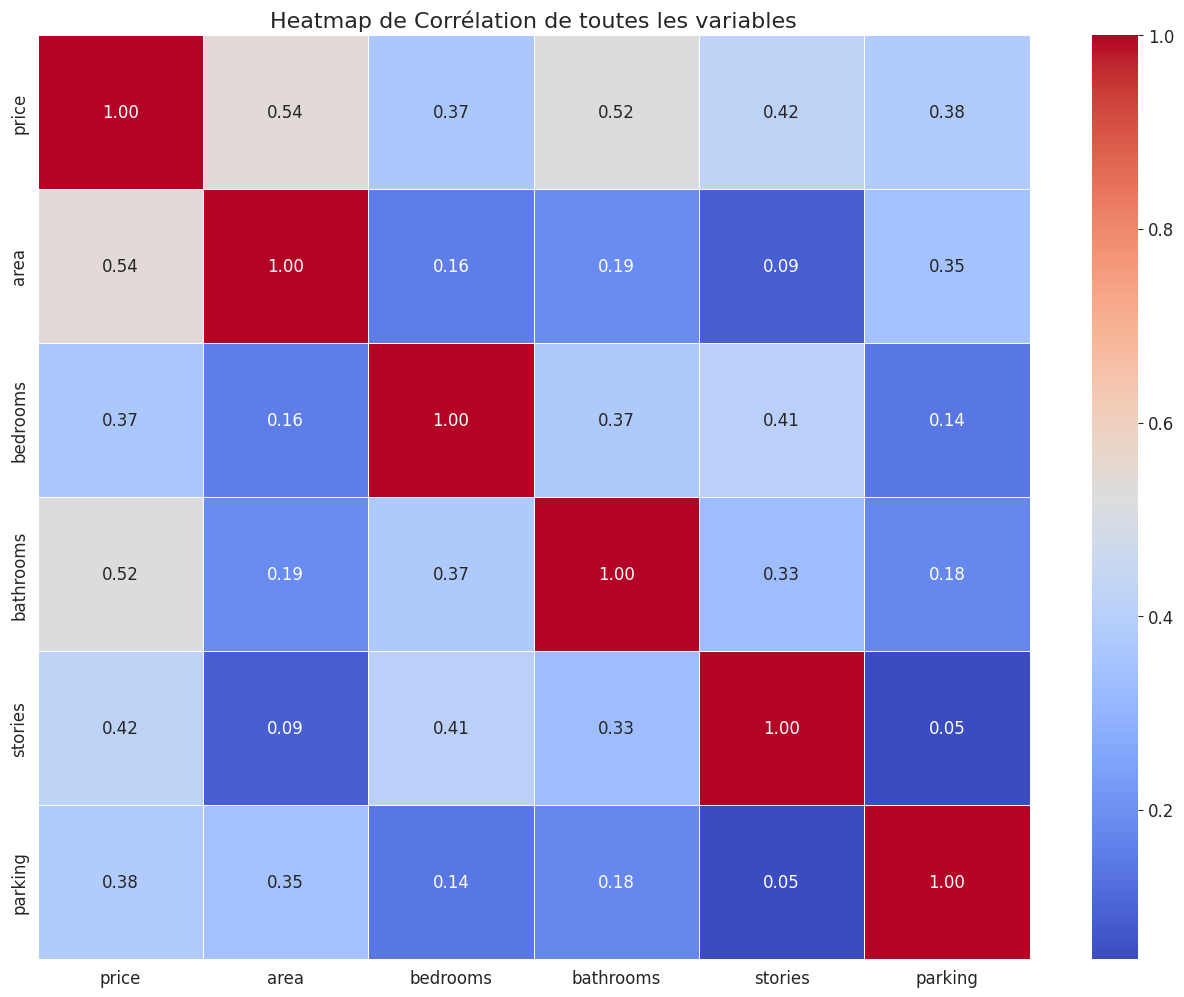

In [ ]:
# ==========================================================
#  2.2 - ANALYSE EXPLORATOIRE DE DONNÉES (EDA) - SUITE
# ==========================================================

# --- 2. Quelles sont les caractéristiques les plus liées au prix ? (Heatmap) ---
# La heatmap de corrélation est l'outil parfait pour avoir une vue d'ensemble
# des relations linéaires entre toutes les variables numériques.

# On calcule la matrice de corrélation
correlation_matrix = df_processed.corr(numeric_only=True)

# On dessine la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap de Corrélation de toutes les variables', fontsize=16)
plt.show()

# Interprétation de la heatmap :
# - Les cases avec des couleurs vives (rouge pour positif, bleu foncé pour négatif)
#   indiquent une forte corrélation.
# - On se concentre sur la première ligne/colonne ('price') pour voir ce qui l'influence.
# - On confirme que 'area' (0.54), 'bathrooms' (0.52) et 'stories' (0.42) sont les plus
#   fortement et positivement corrélées au prix.
# - 'airconditioning' (0.45) et 'parking' (0.38) ont aussi un impact notable.

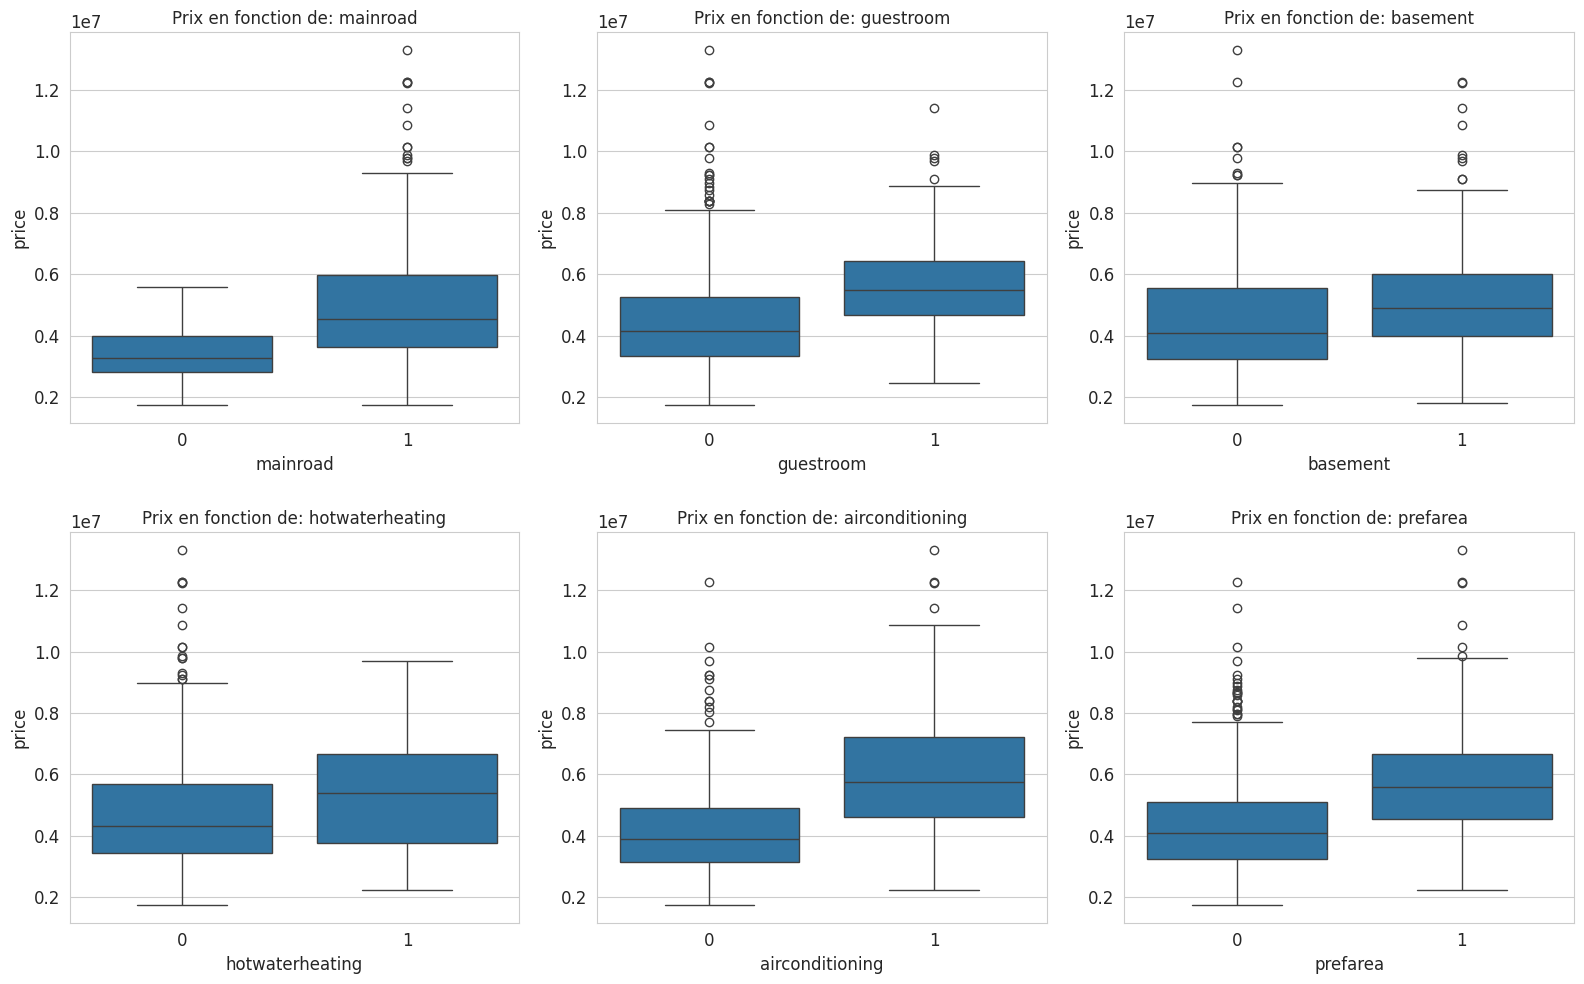

In [ ]:
# --- 3. Comment les caractéristiques binaires (oui/non) influencent-elles le prix ? ---
plt.figure(figsize=(16, 10))
binary_vars_to_plot = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i, col in enumerate(binary_vars_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=col, y='price', data=df_processed)
    plt.title(f'Prix en fonction de: {col}', fontsize=12)
plt.tight_layout()
plt.show()

# Insights : La présence d'une route principale, de la climatisation et d'une zone préférentielle
# semble augmenter significativement le prix médian des maisons.
# La présence du chauffage à eau chaude ne semble pas avoir d'impact (peut-être peu de maisons en ont).

### Étape 2.3 : Prétraitement et Feature Engineering - On prépare le terrain

Maintenant, on transforme nos données brutes en un format que notre modèle mathématique pourra comprendre.

**Notre plan de préparation :**
1.  **Gérer les valeurs manquantes :** On va simuler le nettoyage de la colonne `area` (comme vous l'avez fait).
2.  **Encoder les variables catégorielles :** Transformer le texte en chiffres.
3.  **Mettre à l'échelle les variables numériques :** Mettre tout sur la même échelle pour que le modèle soit juste.

In [ ]:
# --- 1. Gestion des valeurs manquantes (Simulation) ---
# On va simuler le cas où il manquerait des valeurs dans la colonne 'area'.
# Supposons qu'on les remplace par la médiane.
# Dans notre cas, le dataset est propre, mais c'est une étape cruciale en réalité.
if df_processed['area'].isnull().sum() > 0:
    median_area = df_processed['area'].median()
    df_processed['area'].fillna(median_area, inplace=True)
    print("Valeurs manquantes dans 'area' remplacées par la médiane.")
else:
    print("✅ Aucune valeur manquante détectée dans 'area'. Parfait !")

# --- 2. Encodage des variables ---
# a) Variables binaires ('yes'/'no') -> 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# b) Variable à plusieurs catégories ('furnishingstatus') -> One-Hot Encoding
# Cela crée de nouvelles colonnes (furnish_semi-furnished, furnish_unfurnished)
furnishing_dummies = pd.get_dummies(df_processed['furnishingstatus'], prefix='furnish', drop_first=True)
df_processed = pd.concat([df_processed, furnishing_dummies], axis=1)
df_processed = df_processed.drop('furnishingstatus', axis=1)

print("\n✅ Encodage des variables terminé.")
display(df_processed.head())

Valeurs manquantes dans 'area' remplacées par la médiane.

✅ Encodage des variables terminé.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_semi-furnished,furnish_unfurnished
0,13300000,7420.0,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960.0,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960.0,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500.0,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420.0,4,1,2,1,1,1,0,1,2,0,False,False


In [ ]:
# --- 3. Division et Mise à l'échelle ---
# On sépare les données AVANT de les mettre à l'échelle pour éviter le "data leakage".
np.random.seed(42) # Pour la reproductibilité
df_train, df_test = train_test_split(df_processed, train_size=0.8, random_state=100)

# On définit les variables à mettre à l'échelle
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# On crée le scaler et on l'entraîne UNIQUEMENT sur les données d'entraînement
scaler = MinMaxScaler()
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

# On applique la MÊME transformation sur les données de test
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

print("✅ Données divisées et mises à l'échelle.")
display(df_train.head())

✅ Données divisées et mises à l'échelle.


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnish_semi-furnished,furnish_unfurnished
22,8645000,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,False,False
41,7840000,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,False,False
91,6419000,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,False,False
118,5950000,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,False,False
472,3010000,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,True,False


In [ ]:
# 1. Définir X et y
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

# 2. Entraîner le modèle de Régression Linéaire
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("✅ Modèle de Régression Linéaire entraîné !")

✅ Modèle de Régression Linéaire entraîné !


In [ ]:
# 1. Faire des prédictions sur les données de test
y_pred = lr_model.predict(X_test)

# 2. Évaluer avec des métriques
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)

print(f"Performance du modèle sur le set de test :")
print(f"R-squared (R²) : {r2:.4f}")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"\nInterprétation :")
print(f"➡️ Notre modèle explique environ {r2:.0%} de la variation des prix.")
print(f"➡️ En moyenne, nos prédictions sont à {mae:.0f} unités de prix de la réalité (sur une échelle de 0 à 1, car nous avons mis le prix à l'échelle).")

Performance du modèle sur le set de test :
R-squared (R²) : 0.6778
Mean Absolute Error (MAE) : 790635.86

Interprétation :
➡️ Notre modèle explique environ 68% de la variation des prix.
➡️ En moyenne, nos prédictions sont à 790636 unités de prix de la réalité (sur une échelle de 0 à 1, car nous avons mis le prix à l'échelle).


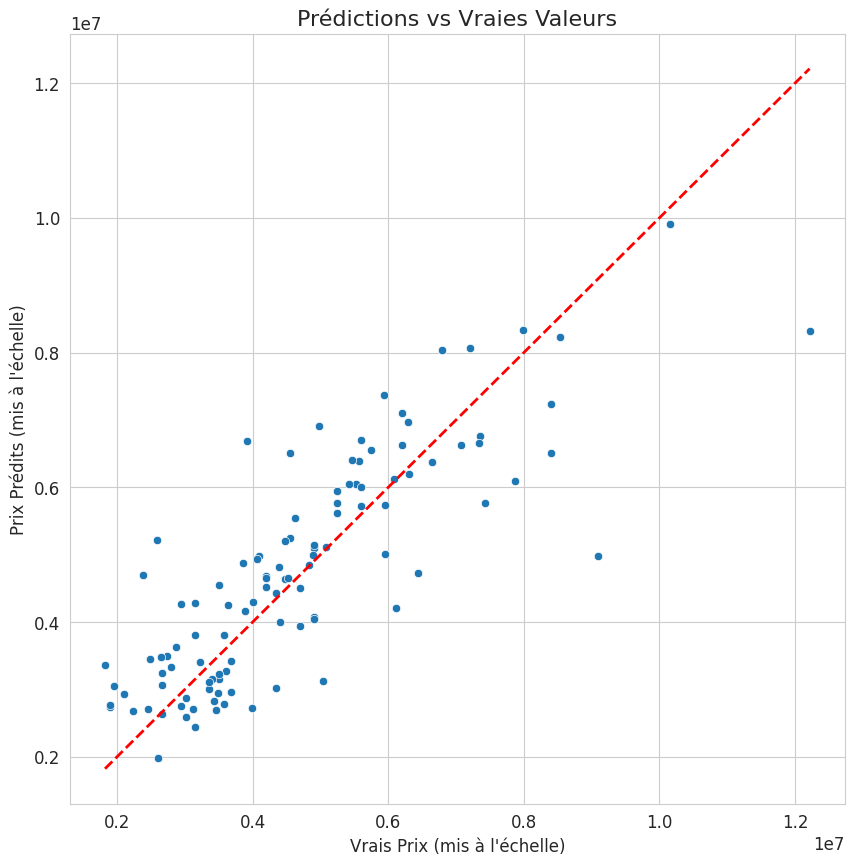

In [ ]:
# 3. Visualisation des résultats : Prédictions vs Réalité
# Un bon modèle aura des points alignés sur la diagonale.
plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red') # Ligne de référence y=x
plt.xlabel('Vrais Prix (mis à l\'échelle)')
plt.ylabel('Prix Prédits (mis à l\'échelle)')
plt.title('Prédictions vs Vraies Valeurs', fontsize=16)
plt.show()
# On voit que les points suivent globalement la ligne rouge, ce qui est un bon signe !

In [ ]:
# Analysons les coefficients du modèle
# Ils nous disent l'impact de chaque caractéristique sur le prix.
coefficients = pd.DataFrame(lr_model.coef_, X_train.columns, columns=['Coefficient'])
print("Impact de chaque caractéristique sur le prix (coefficients du modèle) :")
display(coefficients.sort_values(by='Coefficient', ascending=False))

# Un coefficient positif élevé signifie que lorsque cette caractéristique augmente, le prix augmente fortement.
# Un coefficient négatif signifie l'inverse.

Impact de chaque caractéristique sur le prix (coefficients du modèle) :


,Coefficient
bathrooms,3.455753e+06
area,3.445240e+06
stories,1.197732e+06
airconditioning,8.512579e+05
hotwaterheating,8.386298e+05
parking,7.519591e+05
prefarea,6.205409e+05
mainroad,5.813295e+05
bedrooms,4.672496e+05
guestroom,3.917815e+05


# 🏁 Conclusion & Prochaines Étapes
---
Félicitations ! Vous avez traversé le workflow complet d'un projet de Data Science : de l'exploration initiale à l'interprétation d'un modèle complexe.

### Ce que nous avons accompli :
- ✅ Compris l'intuition de la régression sur un cas simple.
- ✅ Exploré et visualisé un dataset réel.
- ✅ Préparé des données complexes (variables binaires et catégorielles).
- ✅ Entraîné et évalué un modèle de Machine Learning puissant.
- ✅ Interprété les résultats pour comprendre ce que le modèle a appris.

### Votre Aventure Continue... 🚀
Le meilleur moyen d'apprendre est de pratiquer. Voici votre prochain défi :
1.  **Allez sur [Kaggle.com](https://www.kaggle.com/datasets).**
2.  **Trouvez un autre dataset de régression** (ex: prédiction du prix de voitures, des notes de vin, etc.).
3.  **Créez un nouveau notebook et essayez de reproduire toutes ces étapes.**

---
### **Restons Connectés !**
*   **GitHub (ce notebook, slides...) :** [github.com/rmss00-2synf/aids-repo](https://github.com/rmss00-2synf/aids-repo)
*   **LinkedIn :** [linkedin.com/in/nfaly-sylla](https://linkedin.com/in/nfaly-sylla)
*   **Instagram :** [@sylla.rmss](https://www.instagram.com/sylla.rmss/)

> **Merci pour votre participation et votre énergie !**